In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [2]:
from pathlib import Path
DIR=Path('../input/chest-xray-pneumonia/chest_xray')
train_dir=DIR /'train'
val_dir= DIR/ 'val'
test_dir= DIR/ 'test'

In [3]:
import glob
import random
normal_train_dir=train_dir /'NORMAL'
pneumonia_train_dir= train_dir/ 'PNEUMONIA'
normal_cases=normal_train_dir.glob('*.jpeg')
pneumonia_cases=pneumonia_train_dir.glob('*.jpeg')

#give labels
train=[]

for img in normal_cases:
    train.append((img,0))
for img in pneumonia_cases:
    train.append((img,1))

train=pd.DataFrame(train,columns=['image','label'],index=None)
train=train.sample(frac=1.).reset_index(drop=True)
train.head()

,image,label
0,../input/chest-xray-pneumonia/chest_xray/train...,1
1,../input/chest-xray-pneumonia/chest_xray/train...,0
2,../input/chest-xray-pneumonia/chest_xray/train...,1
3,../input/chest-xray-pneumonia/chest_xray/train...,0
4,../input/chest-xray-pneumonia/chest_xray/train...,1


# **Exploratory Data Analysis**

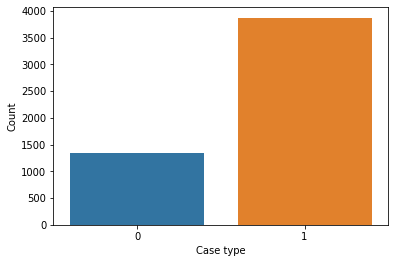

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
fig=plt.figure()
sns.barplot(x=train['label'].value_counts().index,y=train['label'].value_counts().values)
plt.xlabel('Case type')
plt.ylabel('Count')
plt.show()

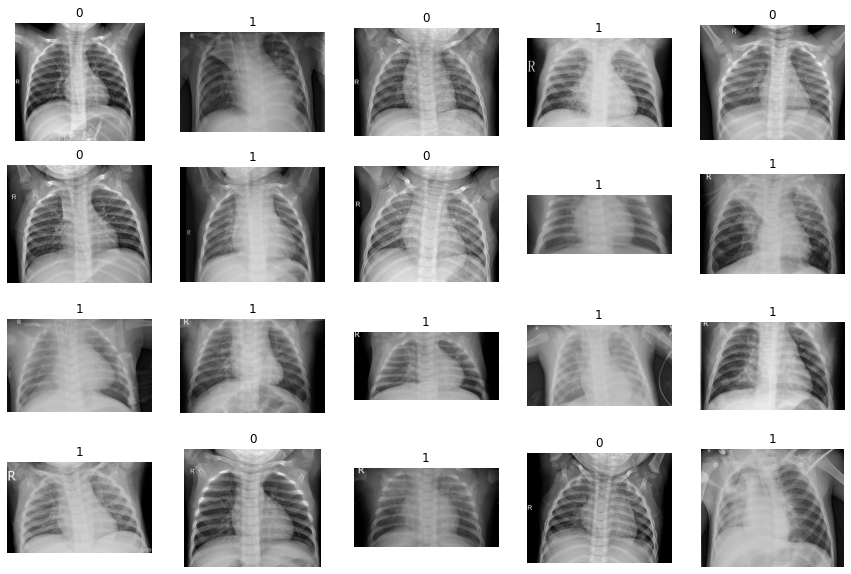

In [5]:
import cv2
fig=plt.figure(figsize=(15,10))
for i in range(1,21):
    img=cv2.imread(str(train['image'][i]))
    ax=fig.add_subplot(4, 5, i)
    ax.title.set_text(train['label'][i])
    plt.axis(False)
    #plt.imshow(img)
    blur = cv2.GaussianBlur(img,(5,5),0)
    plt.imshow(blur)

# **Preparing Validation and Test sets**

In [6]:
normal_val_dir=val_dir /'NORMAL'
pneumonia_val_dir= val_dir/ 'PNEUMONIA'
normal_cases_val=normal_val_dir.glob('*.jpeg')
pneumonia_cases_val=pneumonia_val_dir.glob('*.jpeg')

In [7]:
normal_test_dir=test_dir /'NORMAL'
pneumonia_test_dir= test_dir/ 'PNEUMONIA'
normal_cases_test=normal_test_dir.glob('*.jpeg')
pneumonia_cases_test=pneumonia_test_dir.glob('*.jpeg')

In [8]:
from keras.utils import to_categorical
data=[]
labels=[]
for img in normal_cases_val:
    img=cv2.imread(str(img))
    img=cv2.resize(img,(224,224))
    
    if img.shape[2]==1:
        img=np.dstack([img,img,img])
    #img=cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0,0), 224/10), -4, 128)
    img = cv2.GaussianBlur(img,(5,5),0)
    img=img.astype(np.float32)/255
    label = to_categorical(0, num_classes=2)
    data.append(img)
    labels.append(label)

In [9]:
for img in pneumonia_cases_val:
    img=cv2.imread(str(img))
    img=cv2.resize(img,(224,224))
    if img.shape[2]==1:
        img=np.dstack([img,img,img])
    #img=cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0,0), 224/10), -4, 128)
    img = cv2.GaussianBlur(img,(5,5),0)
    img=img.astype(np.float32)/255
    label = to_categorical(1, num_classes=2)
    data.append(img)
    labels.append(label)

In [10]:
for img in pneumonia_cases_test:
    img=cv2.imread(str(img))
    img=cv2.resize(img,(224,224))
    if img.shape[2]==1:
        img=np.dstack([img,img,img])
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0,0), 224/10), -4, 128)
    img = cv2.GaussianBlur(img,(5,5),0)
    img=img.astype(np.float32)/255
    label = to_categorical(1, num_classes=2)
    data.append(img)
    labels.append(label)

In [11]:
for img in normal_cases_test:
    img=cv2.imread(str(img))
    img=cv2.resize(img,(224,224))
    if img.shape[2]==1:
        img=np.dstack([img,img,img])
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0,0), 224/10), -4, 128)
    img = cv2.GaussianBlur(img,(5,5),0)
    img=img.astype(np.float32)/255
    label = to_categorical(0, num_classes=2)
    data.append(img)
    labels.append(label)

In [12]:
data_tuple= list(zip(data,labels))

In [13]:
data_indf=pd.DataFrame(data_tuple)

In [14]:
data_indf=data_indf.sample(frac=1.).reset_index(drop=True)

In [15]:
images=list(data_indf[0])

In [16]:
labels=list(data_indf[1])

In [17]:
val_data=images[:320]
val_labels=labels[:320]

In [18]:
test_data=images[320:]
test_labels=labels[320:]

In [19]:
val_data=np.array(val_data)
val_labels=np.array(val_labels)

In [20]:
test_data=np.array(test_data)
test_labels=np.array(test_labels)

# **Augmentation**

In [21]:
import imgaug.augmenters as iaa
seq=iaa.OneOf([iaa.Fliplr(),iaa.Affine(rotate=20),iaa.Multiply((1.0,1.5))])

In [22]:
#defining data generator-for augmentation and oversampling
def data_gen(data,batch_size):
    n=len(data)
    steps= n//batch_size
    batch_data=np.zeros(shape=(batch_size,224,224,3),dtype=np.float32)
    batch_labels=np.zeros(shape=(batch_size,2),dtype=np.float32)
    indices=np.arange(n)
    
    i=0
    
    while True:
        
        np.random.shuffle(indices)
        count=0
        next_batch=indices[(i*batch_size):(i+1)*batch_size]
        for j,idx in enumerate(next_batch):
            img_name= data.iloc[idx]['image']
            label=data.iloc[idx]['label']
            encoded_label=to_categorical(label,num_classes=2)
            img=cv2.imread(str(img_name))
            img=cv2.resize(img,(224,224))
            
            if img.shape[2]==1:
                img=np.dstack([img,img,img])
            
                
            orig_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            #orig_img = cv2.addWeighted (orig_img, 4, cv2.GaussianBlur(img, (0,0), 224/10), -4, 128)
            orig_img = cv2.GaussianBlur(orig_img,(5,5),0)
            orig_img = orig_img.astype(np.float32)/255.
            
            batch_data[count]=orig_img
            batch_labels[count]=encoded_label
            
            #oversampling minority count data
            if label==0 and count<batch_size-2:
                
                aug_img1= seq.augment_image(img)
                aug_img2= seq.augment_image(img)
                aug_img1 = cv2.cvtColor(aug_img1, cv2.COLOR_BGR2RGB)
                aug_img2 = cv2.cvtColor(aug_img2, cv2.COLOR_BGR2RGB)
                #aug_img1=cv2.addWeighted (aug_img1, 4, cv2.GaussianBlur(aug_img1, (0,0), 224/10), -4, 128)
                #aug_img2=cv2.addWeighted (aug_img2, 4, cv2.GaussianBlur(aug_img2, (0,0), 224/10), -4, 128)
                aug_img1= cv2.GaussianBlur(aug_img1,(5,5),0)
                aug_img2= cv2.GaussianBlur(aug_img2,(5,5),0)
                aug_img1 = aug_img1.astype(np.float32)/255.
                aug_img2 = aug_img2.astype(np.float32)/255.
                
                batch_data[count+1]=aug_img1
                batch_data[count+2]=aug_img2
                batch_labels[count+1]=encoded_label
                batch_labels[count+2]=encoded_label
                
                count+=2
            else:
                count+=1
            if count==batch_size-1:
                break
        i+=1
        yield batch_data,batch_labels
        if i>=steps:
            i=0

In [23]:
train_data_gen=data_gen(data=train,batch_size=16)

# **Model Building**

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras import applications
base_model=keras.applications.Xception(input_shape=(224,224,3),include_top=False,pooling='avg',classes=2,weights='imagenet')
#base_model.load_weights("../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5")
model2=Sequential()
model2.add(base_model)
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(128, activation = 'relu'))
model2.add(keras.layers.Dropout(0.5))
model2.add(keras.layers.Dense(64, activation = 'relu'))
model2.add(keras.layers.Dropout(0.5))
model2.add(keras.layers.Dense(2, activation = 'softmax'))
for layer in base_model.layers:
    layer.trainable=False

83689472/83683744 [==============================] - 1s 0us/step


In [25]:
model2.compile(optimizer=keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
model2.fit(train_data_gen,epochs=20,validation_data=(val_data,val_labels),steps_per_epoch=train.shape[0]//16,callbacks=[early_stopping_cb])

Epoch 1/20
326/326 [==============================] - 96s 270ms/step - loss: 0.3949 - accuracy: 0.8321 - val_loss: 0.6131 - val_accuracy: 0.7875
Epoch 2/20
326/326 [==============================] - 74s 229ms/step - loss: 0.1994 - accuracy: 0.9247 - val_loss: 0.5166 - val_accuracy: 0.8219
Epoch 3/20
326/326 [==============================] - 69s 213ms/step - loss: 0.1727 - accuracy: 0.9306 - val_loss: 0.3996 - val_accuracy: 0.8188
Epoch 4/20
326/326 [==============================] - 68s 208ms/step - loss: 0.1629 - accuracy: 0.9378 - val_loss: 0.4738 - val_accuracy: 0.8062
Epoch 5/20
326/326 [==============================] - 65s 199ms/step - loss: 0.1464 - accuracy: 0.9459 - val_loss: 0.3631 - val_accuracy: 0.8406
Epoch 6/20
326/326 [==============================] - 67s 207ms/step - loss: 0.1546 - accuracy: 0.9376 - val_loss: 0.3540 - val_accuracy: 0.8656
Epoch 7/20
326/326 [==============================] - 65s 200ms/step - loss: 0.1213 - accuracy: 0.9515 - val_loss: 0.5317 - val_ac

In [27]:
model2.evaluate(test_data,test_labels,batch_size=16)

20/20 [==============================] - 2s 45ms/step - loss: 0.3972 - accuracy: 0.9062


[0.3972102999687195, 0.90625]

In [28]:
preds2=model2.predict(test_data,batch_size=16)
preds2=np.argmax(preds2,axis=-1)
orig_test_labels2=np.argmax(test_labels,axis=-1)


In [29]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(orig_test_labels2,preds2)
tn, fp, fn, tp = cm.ravel()

precision= tp/(tp+fp)
recall=tp/(tp+fn)
print(f'precision:{precision} \nrecall:{recall}')
f1score=(2*precision*recall)/(precision+recall)
print(f'f1 score: {f1score}')

precision:0.9 
recall:0.9545454545454546
f1 score: 0.9264705882352942


<Figure size 432x288 with 0 Axes>

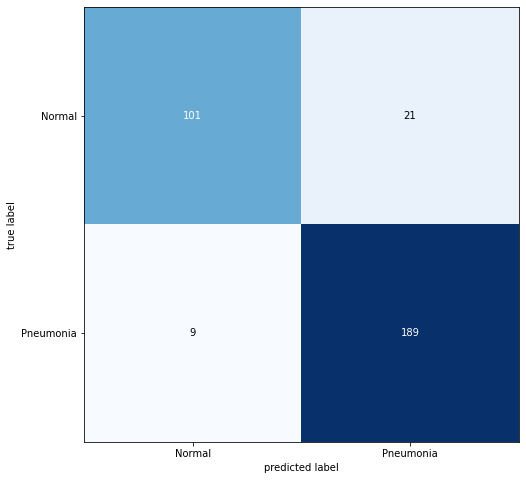

In [30]:
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2),['Normal','Pneumonia'])
plt.yticks(range(2),['Normal','Pneumonia'])
plt.show()